In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image

sns.set_style('darkgrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#create an empty DataFrame
df = pd.DataFrame(columns=['path','label'])

#loop over fire images and label them 1
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Fire Detection/fire_images'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label']))

#loop over non fire images and label them 0
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Fire Detection/non_fire_images'):
    for filename in filenames:
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'non_fire']],columns=['path','label']))
        #print(os.path.join(dirname, filename))

#shuffle the dataset for redistribute the labels
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

<ipython-input-3-6d60af67e96e>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label']))
<ipython-input-3-6d60af67e96e>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label']))
<ipython-input-3-6d60af67e96e>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label']))
<ipython-input-3-6d60af67e96e>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[

path     label
0  /content/drive/MyDrive/Fire Detection/fire_ima...      fire
1  /content/drive/MyDrive/Fire Detection/fire_ima...      fire
2  /content/drive/MyDrive/Fire Detection/non_fire...  non_fire
3  /content/drive/MyDrive/Fire Detection/fire_ima...      fire
4  /content/drive/MyDrive/Fire Detection/non_fire...  non_fire
5  /content/drive/MyDrive/Fire Detection/non_fire...  non_fire
6  /content/drive/MyDrive/Fire Detection/fire_ima...      fire
7  /content/drive/MyDrive/Fire Detection/fire_ima...      fire
8  /content/drive/MyDrive/Fire Detection/fire_ima...      fire
9  /content/drive/MyDrive/Fire Detection/fire_ima...      fire

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, {"type": "pie"}]])


fig.add_trace(go.Bar(x =df['label'].value_counts().index,y=df['label'].value_counts().to_numpy(),marker_color=['darkorange','green'],showlegend=False),row=1,col=1)

fig.add_trace(go.Pie(
     values=df['label'].value_counts().to_numpy(),
     labels=df['label'].value_counts().index,
    marker=dict(colors=['darkorange','green'])),
    row=1, col=2)

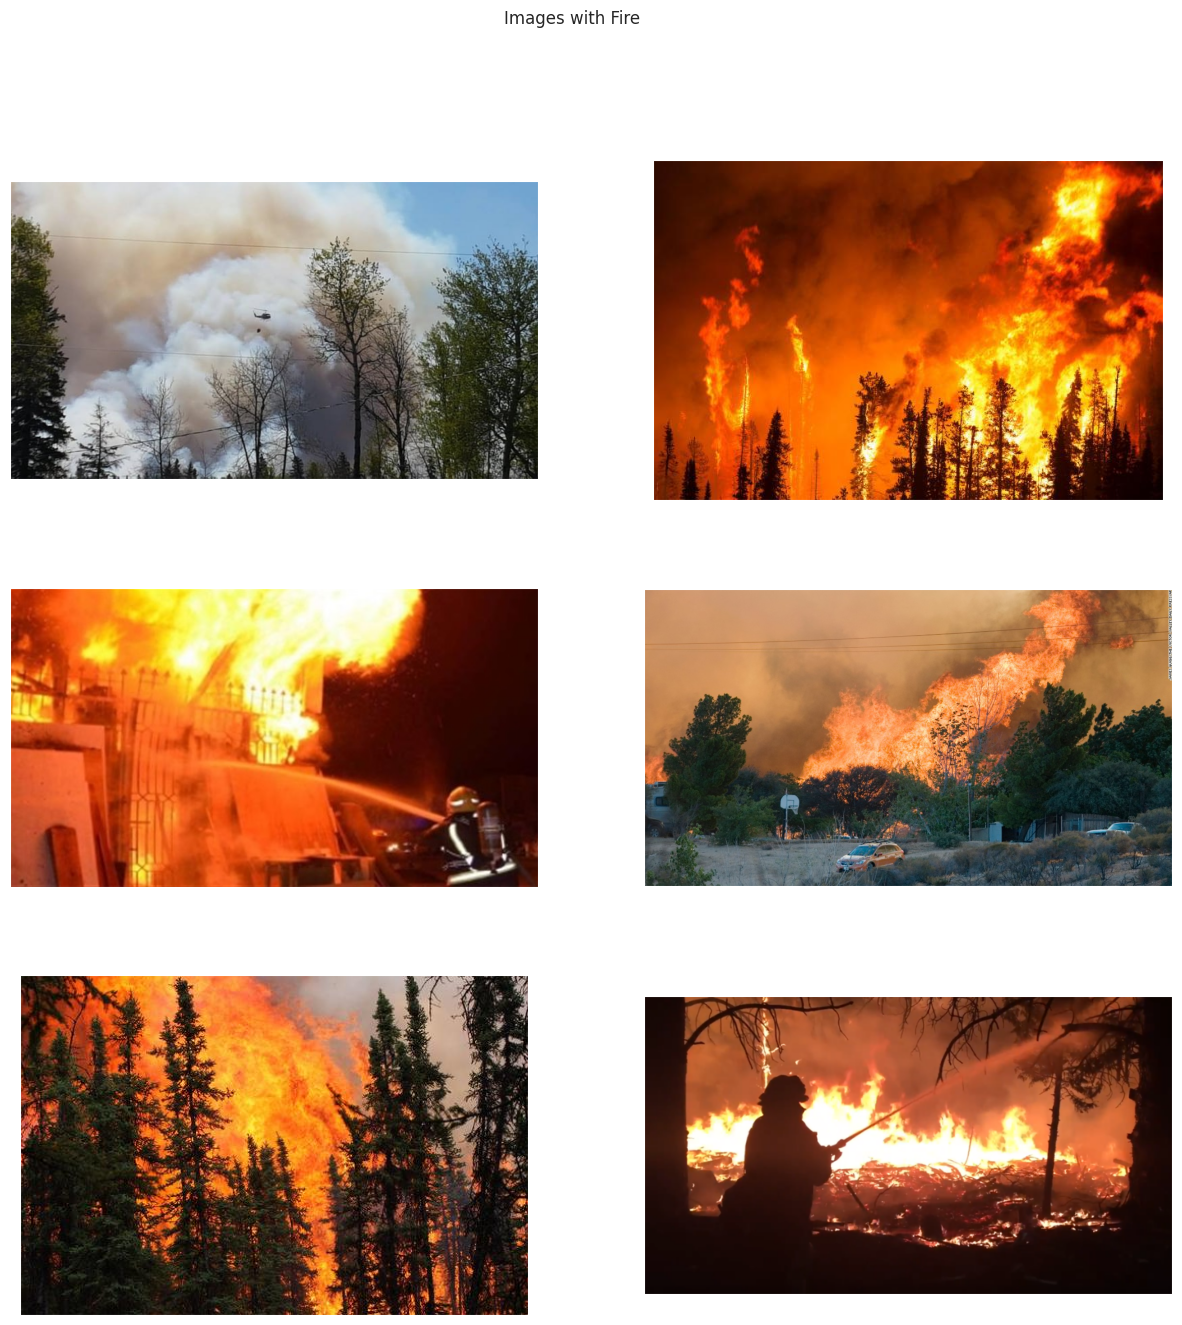

In [ ]:
label = 'fire' #label for images with fire
data = df[df['label'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

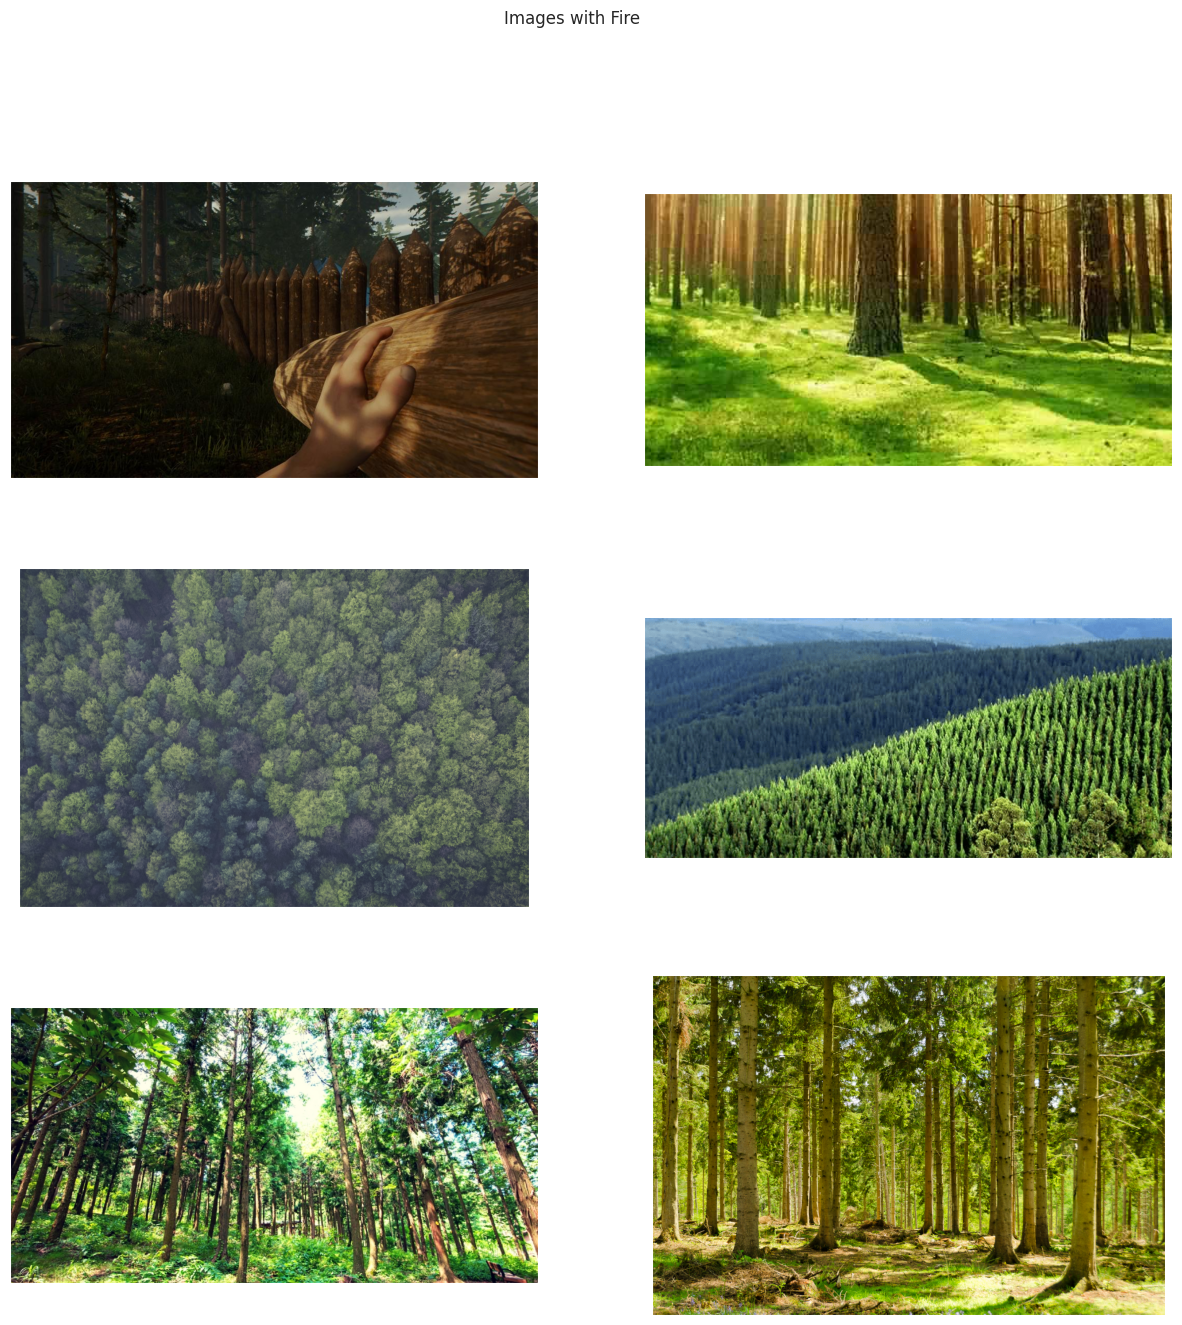

In [ ]:
label = 'non_fire' #label for images without fire
data = df[df['label'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

In [ ]:
def shaper(row):
    shape = image.load_img(row['path']).size
    row['height'] = shape[1]
    row['width'] = shape[0]
    return row
df = df.apply(shaper,axis=1)
df.head(5)

path     label  height  width
0  /content/drive/MyDrive/Fire Detection/non_fire...  non_fire     800    800
1  /content/drive/MyDrive/Fire Detection/non_fire...  non_fire     335    733
2  /content/drive/MyDrive/Fire Detection/fire_ima...      fire    2024   3000
3  /content/drive/MyDrive/Fire Detection/non_fire...  non_fire     768   1920
4  /content/drive/MyDrive/Fire Detection/fire_ima...      fire     434    634

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
generator = ImageDataGenerator(
    rotation_range= 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range = 2,
    zoom_range=0.2,
    rescale = 1/255,
    validation_split=0.2,
)

In [ ]:
train_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='training')
val_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='validation')

Found 800 validated image filenames belonging to 2 classes.
Found 199 validated image filenames belonging to 2 classes.


In [ ]:
class_indices = {}
for key in train_gen.class_indices.keys():
    class_indices[train_gen.class_indices[key]] = key

print(class_indices)

{0: 'fire', 1: 'non_fire'}


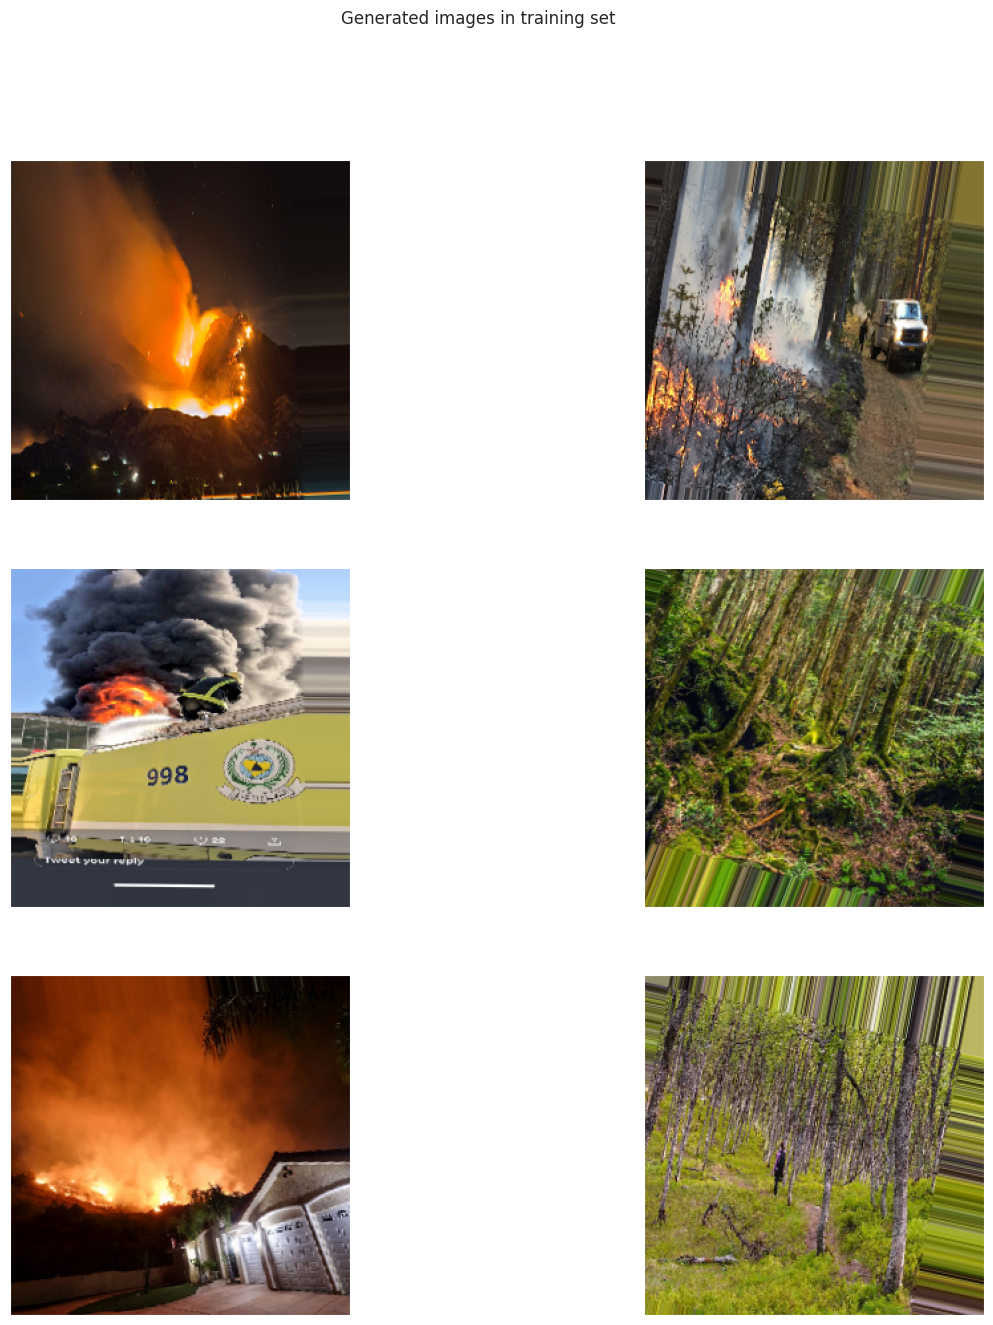

In [ ]:
sns.set_style('dark')
pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Generated images in training set')
ax = ax.ravel()
for i in range((pics//2)*2):
    ax[i].imshow(train_gen[0][0][i])
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size = (2,2),activation='relu',input_shape = (256,256,3)))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=128,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 128)       0

In [ ]:
from tensorflow.keras.metrics import Recall,AUC
from tensorflow.keras.utils import plot_model

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',Recall(),AUC()])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
early_stoppping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5)


In [ ]:
 model.fit(x=train_gen,batch_size=32,epochs=15,validation_data=val_gen,callbacks=[early_stoppping,reduce_lr_on_plateau])

Epoch 1/15
25/25 [==============================] - 132s 5s/step - loss: 0.4535 - accuracy: 0.8363 - recall: 0.4769 - auc: 0.8522 - val_loss: 0.1841 - val_accuracy: 0.9296 - val_recall: 0.9592 - val_auc: 0.9742 - lr: 0.0010
Epoch 2/15
25/25 [==============================] - 128s 5s/step - loss: 0.1568 - accuracy: 0.9388 - recall: 0.8718 - auc: 0.9786 - val_loss: 0.1414 - val_accuracy: 0.9548 - val_recall: 0.8980 - val_auc: 0.9852 - lr: 0.0010
Epoch 3/15
25/25 [==============================] - 130s 5s/step - loss: 0.1949 - accuracy: 0.9137 - recall: 0.8051 - auc: 0.9659 - val_loss: 0.1945 - val_accuracy: 0.9146 - val_recall: 0.6939 - val_auc: 0.9786 - lr: 0.0010
Epoch 4/15
25/25 [==============================] - 129s 5s/step - loss: 0.1642 - accuracy: 0.9375 - recall: 0.8872 - auc: 0.9771 - val_loss: 0.1501 - val_accuracy: 0.9296 - val_recall: 0.7959 - val_auc: 0.9833 - lr: 0.0010
Epoch 5/15
25/25 [==============================] - 132s 5s/step - loss: 0.1271 - accuracy: 0.9475 - rec

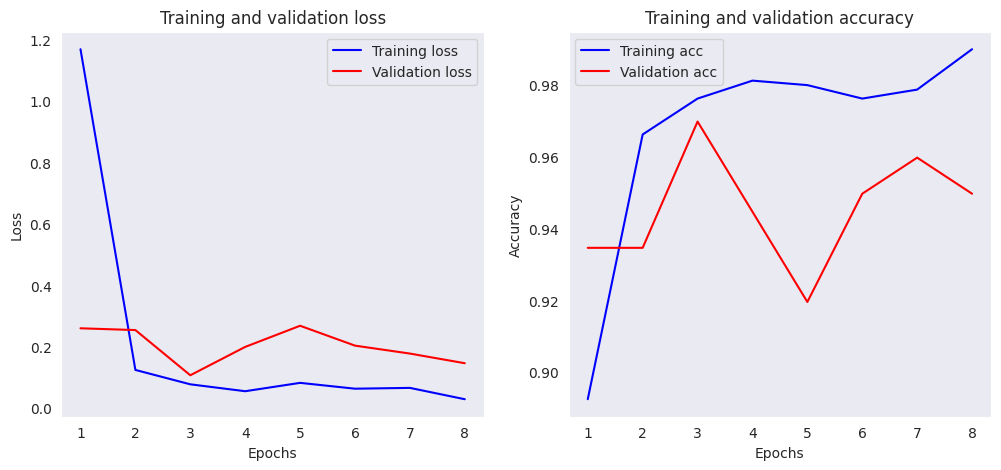

In [ ]:
import matplotlib.pyplot as plt

loss = history2.history['loss']
val_loss = history2.history['val_loss']
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
eval_list = model.evaluate(val_gen,return_dict=True)
for metric in eval_list.keys():
    print(metric+f": {eval_list[metric]:.2f}")

7/7 [==============================] - 15s 2s/step - loss: 0.1466 - accuracy: 0.9598 - recall: 0.9388 - auc: 0.9786
loss: 0.15
accuracy: 0.96
recall: 0.94
auc: 0.98


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout

In [ ]:
xception = Xception(include_top = False,input_shape = (256,256,3))
input_to_model = xception.input
#turn off training
xception.trainable = False

x = Flatten()(xception.output)
x = Dense(64,activation = 'relu')(x)
output_to_model = Dense(1,activation = 'sigmoid')(x)
model2 = Model(inputs = input_to_model,outputs = output_to_model)

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
model2.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy',Recall(),AUC()])

In [ ]:
history2 = model2.fit(x = train_gen,batch_size=32,epochs=15,callbacks = [early_stoppping,reduce_lr_on_plateau],validation_data = val_gen)

Epoch 1/15
25/25 [==============================] - 335s 13s/step - loss: 1.1692 - accuracy: 0.8925 - recall_1: 0.8000 - auc_1: 0.9052 - val_loss: 0.2604 - val_accuracy: 0.9347 - val_recall_1: 0.8776 - val_auc_1: 0.9592 - lr: 0.0010
Epoch 2/15
25/25 [==============================] - 354s 14s/step - loss: 0.1249 - accuracy: 0.9663 - recall_1: 0.9282 - auc_1: 0.9906 - val_loss: 0.2547 - val_accuracy: 0.9347 - val_recall_1: 0.9184 - val_auc_1: 0.9611 - lr: 0.0010
Epoch 3/15
25/25 [==============================] - 347s 14s/step - loss: 0.0780 - accuracy: 0.9762 - recall_1: 0.9538 - auc_1: 0.9919 - val_loss: 0.1075 - val_accuracy: 0.9698 - val_recall_1: 0.9388 - val_auc_1: 0.9914 - lr: 0.0010
Epoch 4/15
25/25 [==============================] - 345s 14s/step - loss: 0.0555 - accuracy: 0.9812 - recall_1: 0.9487 - auc_1: 0.9977 - val_loss: 0.1998 - val_accuracy: 0.9447 - val_recall_1: 0.9796 - val_auc_1: 0.9877 - lr: 0.0010
Epoch 5/15
25/25 [==============================] - 346s 14s/step - 

In [ ]:
eval_list = model.evaluate(val_gen,return_dict=True)
for metric in eval_list.keys():
    print(metric+f": {eval_list[metric]:.2f}")

7/7 [==============================] - 13s 2s/step - loss: 0.1407 - accuracy: 0.9598 - recall: 0.9388 - auc: 0.9865
loss: 0.14
accuracy: 0.96
recall: 0.94
auc: 0.99


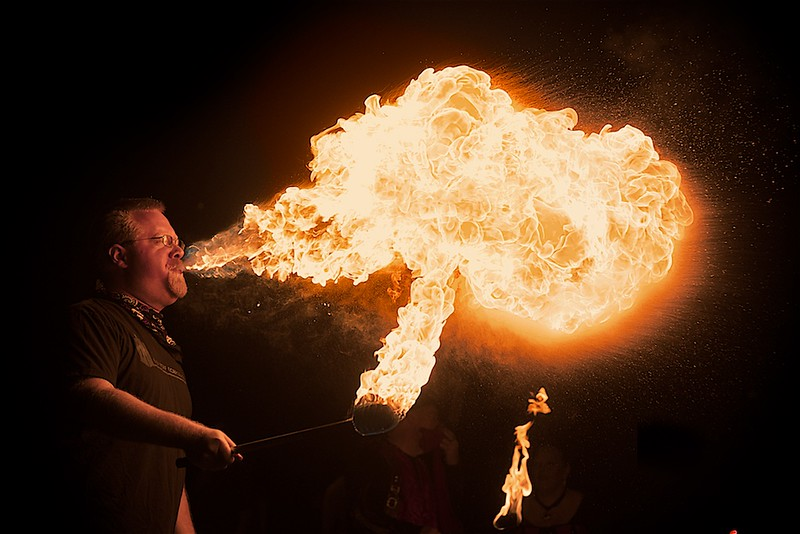

In [ ]:
#loading the image
img = image.load_img('/content/drive/MyDrive/Fire Detection/fire.jpg')
img

In [ ]:
img = image.img_to_array(img)/255
img = tf.image.resize(img,(256,256))
img = tf.expand_dims(img,axis=0)

print("Image Shape",img.shape)

Image Shape (1, 256, 256, 3)


In [ ]:
prediction = int(tf.round(model2.predict(x=img)).numpy()[0][0])
print("The predicted value is: ",prediction,"and the predicted label is:",class_indices[prediction])

1/1 [==============================] - 1s 1s/step
The predicted value is:  0 and the predicted label is: fire
